In [8]:
import csv
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

datafile = 'data.txt'
data_ = pd.read_csv(datafile,sep=' ',header=None)

# datafile = 'twitter_1000000.txt'
# data_ = pd.read_csv(datafile,sep=' |\t|[|]',header=None,engine='python')
#print( data_ )
print('Data loaded')

Data loaded


In [9]:
# Put data in array (I hate pandas)
data = np.array(data_)
n = np.shape(data)[0]

In [10]:
K = 2

if K > n:
    print('K is too high ! __ K>n __')
if K == 1:
    print('Are you serious ? __ K=1 __')
if K == n:
    print('Are you serious ? __ K=n __')

<function matplotlib.pyplot.show>

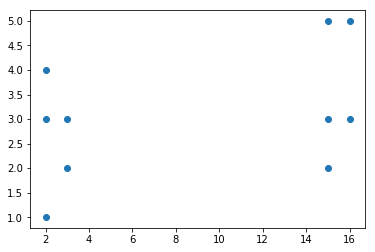

In [30]:
plt.scatter(data[:,1],data[:,2])
plt.show

[5, 8]
[[2, 3], [2, 4]]


<function matplotlib.pyplot.show>

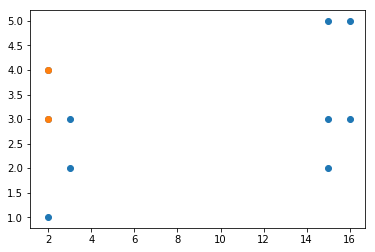

In [42]:
# Select initial centroids randomly 
centroids_cords = []
centroids = []
for i in range(K): 
    while True:
        c = random.randint(0,n-1)
        if not ( c in centroids ):
            centroids.append(c)
            centroids_cords.append( [data[c,1] , data[c,2]] )
            break;

# Print Result
print(centroids)
print(centroids_cords)

cent_cords = np.array(centroids_cords)
plt.scatter(data[:,1],data[:,2])
plt.scatter(cent_cords[:,0],cent_cords[:,1])
plt.show


In [43]:
# Returns the order of the closest centroid (value between 0 and K-1)
#a: number of the point
#centroids_cords: array of the coords of the centroids
def closest_centroid(a,centroids_cords):
    closest = centroids_cords[0]
    d_ = (data[a,1] - closest[0])**2 + (data[a,2] - closest[1])**2
    closest = 0
    for i in range(1,K):
        d = (data[a,1] - centroids_cords[i][0])**2 + (data[a,2] - centroids_cords[i][1])**2
        if (d < d_) :
            d_ = d
            closest = i
    return closest

# CHECK REQUIRED IF SAME COORDS COEXIST            

In [44]:
# basic test
for k in range(K):
    if ( not ( closest_centroid(centroids[k],centroids_cords)  == k ) ):
        print ("test failed for the %d-th centroid !" % k)
print ("success !")
        

success !


In [46]:
print("Initial centroids: %s " % centroids)
print("Initial centroids coords : %s" % centroids_cords)

while True:
    #FORM CLUSTERS
    
    # create empty clusters
    clusters = {}
    for i in range(K):
        clusters[i] = []
    
    # adding points to associated clusters
    for point in range(n):
        closest = closest_centroid(point,centroids_cords)
        if closest in clusters:
            clusters[closest].append(point)
        else:
            print('UnexpectedError: closest centroid not in centroids')
    
    # Recompute centroids
    new_centroids_cords = []
    for c in range(K):
        x = 0;
        y = 0;
        for i in clusters[c]:
            x += data[i,1]
            y += data[i,2]
        new_centroids_cords.append([ x/len(clusters[c]) , y/len(clusters[c]) ])
    
    if np.allclose(centroids_cords, new_centroids_cords, rtol=1e-03):
        break;
    centroids_cords = new_centroids_cords

print('TERMINATED !!!')
    

Initial centroids: [5, 8] 
Initial centroids coords : [[2, 3], [2, 4]]
TERMINATED !!!


In [50]:
clusters

{0: [4, 5, 6, 8, 9], 1: [0, 1, 2, 3, 7]}

In [47]:
# The final centroids retrieved
print(new_centroids_cords)

[[2.3999999999999999, 2.6000000000000001], [15.4, 3.6000000000000001]]


<function matplotlib.pyplot.show>

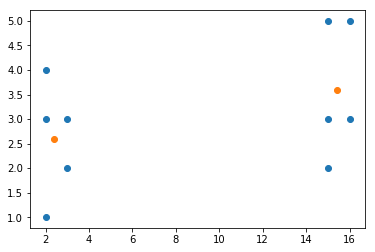

In [49]:
n_cent_cords = np.array(new_centroids_cords)
plt.scatter(data[:,1],data[:,2])
plt.scatter(n_cent_cords[:,0],n_cent_cords[:,1])
plt.show